In [22]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.optimize import curve_fit
import os
import glob

In [2]:
%matplotlib widget

In [ ]:
#osc.decimation=32768
#osc.trigger_post=11444
#osc.trigger_pre=0
#osc.trig_src=8
#osc.get_measurement_time()=2.999975936
#osc.amount_datapoints=11444

# Load data

In [45]:
common_path = '/home/tomi/Documents/facultad/tesis/horibaPTI-controller/calibracion/rp_decay/data/rp-decay/exp2_standalone/'
times_path = f"{common_path}times*"
amount_windows = 5
screens_windows_path = []
for w in range(amount_windows):
    screens_windows_path.append(glob.glob(f"{common_path}w{w}*"))
times_paths = glob.glob(times_path)
print(times_paths)
print(screens_windows_path)

['/home/tomi/Documents/facultad/tesis/horibaPTI-controller/calibracion/rp_decay/data/rp-decay/exp2_standalone/times_w0.npy', '/home/tomi/Documents/facultad/tesis/horibaPTI-controller/calibracion/rp_decay/data/rp-decay/exp2_standalone/times_w1.npy', '/home/tomi/Documents/facultad/tesis/horibaPTI-controller/calibracion/rp_decay/data/rp-decay/exp2_standalone/times_w2.npy', '/home/tomi/Documents/facultad/tesis/horibaPTI-controller/calibracion/rp_decay/data/rp-decay/exp2_standalone/times_w3.npy', '/home/tomi/Documents/facultad/tesis/horibaPTI-controller/calibracion/rp_decay/data/rp-decay/exp2_standalone/times_w4.npy']
[['/home/tomi/Documents/facultad/tesis/horibaPTI-controller/calibracion/rp_decay/data/rp-decay/exp2_standalone/w0b52ol0.5_3.0.npy', '/home/tomi/Documents/facultad/tesis/horibaPTI-controller/calibracion/rp_decay/data/rp-decay/exp2_standalone/w0b49ol0.5_3.0.npy', '/home/tomi/Documents/facultad/tesis/horibaPTI-controller/calibracion/rp_decay/data/rp-decay/exp2_standalone/w0b22ol0

# Plot data

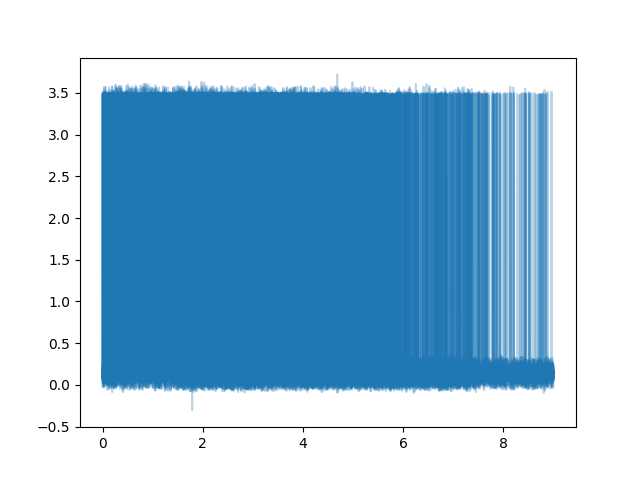

In [46]:
plt.close('all')
for time_path, screen_window_path in zip(times_paths, screens_windows_path):
    time = np.load(time_path)
    for screen_path in screen_window_path:
        screen = np.load(screen_path)
        plt.plot(time, screen, alpha=0.3, color='C0')

plt.show()

# Count where the peaks are

In [47]:
def count_peaks(data, threshold=2):
    times, screen = data
    peaks = np.where(np.diff(screen) > threshold)[0]
    return times[peaks]

def count_peaks_from_paths(time_paths, screen_window_paths):
    counts = np.array([])
    for time_path, screen_window_path in zip(time_paths, screen_window_paths):
        time = np.load(time_path)
        for screen_path in screen_window_path: 
            screen = np.load(screen_path)
            peaks = count_peaks((time, screen))
            counts = np.hstack((counts, peaks))
    return counts

counts = count_peaks_from_paths(times_paths, screens_windows_path)

# Calculate Histogram 

In [52]:
lifetime = 3.0
bins = np.linspace(0, 3*lifetime, 50)
freq, bins = np.histogram(counts, density=True, bins=bins)
bin_width = bins[1] - bins[0]
bin_centres = bins[1:] - bin_width

# Plot Histogram

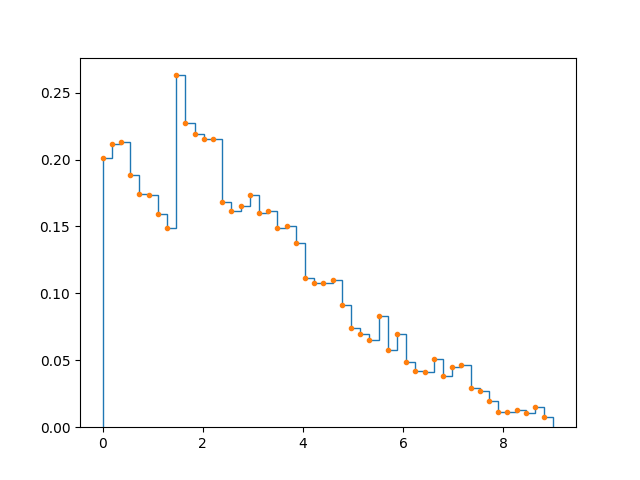

In [53]:
plt.close('all')
plt.stairs(freq, bins)
plt.plot(bin_centres, freq, '.')
plt.show()

# Fit exponential and lineal

In [54]:

def expon(x, a, t):
    return a*np.exp(-x/t)

def lin(x, m, b):
    return m*x + b

p0 = [1.0, 4.0]
popt, pcov = curve_fit(expon, bin_centres, freq, p0)
a, t = popt
aerr, terr = np.sqrt(np.diag(pcov))
print(a,t)
print(pcov)
popt, pcov = curve_fit(lin, bin_centres, freq)
m, b = popt
merr, berr = np.sqrt(np.diag(pcov))
print(m, b)
print(pcov)

0.2502385320039216 4.7238614521864175
[[ 0.00016753 -0.00387275]
 [-0.00387275  0.16702902]]
-0.026685433954242433 0.2287448607869553
[[ 1.66120705e-06 -7.32287189e-06]
 [-7.32287189e-06  4.34888922e-05]]


# Plot fit and data

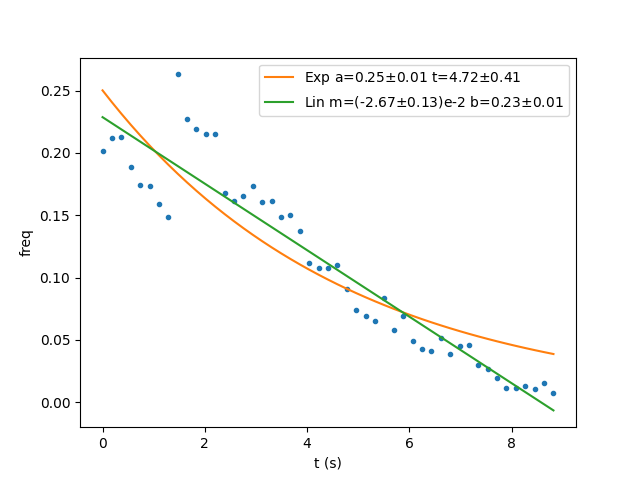

In [55]:
plt.close('all')
plt.plot(bin_centres, freq, '.')
plt.plot(bin_centres, expon(bin_centres, a,t ), label=f"Exp a={a:.2f}$\pm${aerr:.2f} t={t:.2f}$\pm${terr:.2f}")
plt.plot(bin_centres, lin(bin_centres, m, b), label=f"Lin m=({m*100:.2f}$\pm${merr*100:.2f})e-2 b={b:.2f}$\pm${berr:.2f}")
plt.legend()
plt.xlabel("t (s)")
plt.ylabel("freq")
plt.show()